# STEPS INVOLVE IN THIS PROJECT

## 1.Understanding the problem statement.

## 2.Data collection.

## 3.EDA

## 4.Data cleaning.

## 5.Data preprocessing.

## 6.Model Training.

## 7.Choose best model


# 1.Problem statement


  ### Customer Analysis is a detailed analysis of a company’s customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviours and concerns of different types of customers. Customer analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment

## Features Information:

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month



# 2.Data Collection


In [1]:
 #importing libraries and the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pandas.core.apply import frame_apply
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("C:/Users/user/Downloads/customer_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,5,0,0,0,0,0,0,3,11,0


# 3. EDA

In [3]:
#shape of data
df.shape

(2240, 29)

In [4]:
#info of the data
df.info

<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0    04/09/12    

In [5]:
#describe
df.describe

<bound method NDFrame.describe of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0    04/09/12  

In [6]:
#checking null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df=df.dropna()
df.shape

(2216, 29)

In [8]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Data Pre-Processing & Feature Selection

### Data Transformation & aggregartion

    The raw data availaible posses no buisiness value. It needs to be transformed & aggregrated to make it suitable to derieve buisiness insights. Under this section we will be applying transformations to some of the columns and also adding/removing columns to make the dataset more neat & meaningful.

In [9]:
def isLeap(year):
    Leap= None
    if year % 400==0: 
        Leap = True
    elif year % 100 == 0:
        Leap = False
    elif year % 4 == 0:
        Leap = True
    else:
        Leap = False
    return Leap

def get_LastVisit(date):
    Months = [31,28,31,30,31,30,31,31,30,31,30,31]
    today = [1,1,2023]
    d,m,y = list(map(int,date.split('-')))
    Months[1] = 29 if isLeap(y) else 28
    d1 = Months[m-1]-d + (today[0]-1)
    d2 = sum(Months[m:])+sum(Months[:today[0]-1])
    d3 = sum([366 if isLeap(y) else 365 for y in range(y+1,today[2])])
    diff = d1+d2+d3
    return diff

def getAgeGroup(age):
    ageGroup = ''
    if age <= 18:
        ageGroup = 'Teenager'
    elif age >18 and age<= 30:
        ageGroup = 'Bachelors'
    elif age >30 and age<=50:
        ageGroup  = 'Adults'
    elif age >50 and age<=70:
        ageGroup = 'Seniors'
    elif age>=70 and age<100:
        ageGroup = 'Retired'
    else:
        ageGroup = 'Expired'
    return ageGroup


def AcceptOffer(responses):
    Accepted = 0
    if 1 in responses:
        Accepted = 1

    return Accepted

In [10]:
def get_LastVisit(date):
    if isinstance(date, str):
        Months = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
        today = [1, 1, 2023]
        d, m, y = list(map(int, date.split('/')))
        Months[1] = 29 if isLeap(y) else 28
        d1 = Months[m - 1] - d + (today[0] - 1)
        d2 = sum(Months[m:]) + sum(Months[:today[0] - 1])
        d3 = sum([366 if isLeap(y) else 365 for y in range(y + 1, today[2])])
        diff = d1 + d2 + d3
        return diff
    else:
        return 0  # Return 0 or handle the case when the date is not a string

# Rest of the code...
df['Age']=df.apply(lambda row: 2023- int(row.Year_Birth), axis=1)
df['FirstVisit'] = df.apply(lambda row : get_LastVisit(row.Dt_Customer),axis=1)
df['AgeGroup'] = df.apply(lambda row: getAgeGroup(row.Age), axis = 1)
df.rename(columns= {'Response': 'AcceptedCmpN'}, inplace = True)
df["OfferAccepted"] = df.apply(lambda row : AcceptOffer([row.AcceptedCmp1,row.AcceptedCmp2,row.AcceptedCmp3,row.AcceptedCmp4,row.AcceptedCmp5,row.AcceptedCmpN]), axis = 1)
   

### Feature Selection
  Now that we have our data transformed & aggregrated , lets get rid of the columns that are of no use in our project. For example columns such as primary keys / redundant columns are needed to be get rid of.

In [11]:
df2 = df[['Age', 'AgeGroup','Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'FirstVisit', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', "OfferAccepted", 'Complain']]
df2

,Age,AgeGroup,Education,Marital_Status,Income,Kidhome,Teenhome,FirstVisit,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,OfferAccepted,Complain
0,66,Seniors,Graduation,Single,58138.0,0,0,734255,58,635,...,172,88,88,3,8,10,4,7,1,0
1,69,Seniors,Graduation,Single,46344.0,1,1,733705,38,11,...,2,1,6,2,1,1,2,5,0,0
2,58,Seniors,Graduation,Together,71613.0,0,0,733904,26,426,...,111,21,42,1,8,2,10,4,0,0
3,39,Adults,Graduation,Together,26646.0,1,0,733731,26,11,...,10,3,5,2,2,0,4,6,0,0
4,42,Adults,PhD,Married,58293.0,1,0,733753,94,173,...,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,56,Seniors,Graduation,Married,61223.0,0,1,733973,46,709,...,42,118,247,2,9,3,4,5,0,0
2236,77,Retired,PhD,Together,64014.0,2,1,733611,56,406,...,0,0,8,7,8,2,5,7,1,0
2237,42,Adults,Graduation,Divorced,56981.0,0,0,733747,91,908,...,32,12,24,1,2,3,13,6,1,0
2238,67,Seniors,Master,Together,69245.0,0,1,733748,8,428,...,80,30,61,2,6,5,10,3,0,0


In [12]:
df2.describe()

,Age,Income,Kidhome,Teenhome,FirstVisit,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,OfferAccepted,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,54.179603,52247.251354,0.441787,0.505415,733945.521209,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.273014,0.009477
std,11.985554,25173.076661,0.536896,0.544181,202.434667,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.445609,0.096907
min,27.000000,1730.000000,0.000000,0.000000,733592.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,35303.000000,0.000000,0.000000,733772.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,53.000000,51381.500000,0.000000,0.000000,733947.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,64.000000,68522.000000,1.000000,1.000000,734121.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1.000000,0.000000
max,130.000000,666666.000000,2.000000,2.000000,734291.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


### Count Analysis of Categorical attributes in our dataset
    Now that we have our dataset clean , it now has meaning. In buisiness , this dataset is considered as Gold data. Lets now get started to explore for correlations , distributions or spread of the varaibles throughout the sample space.

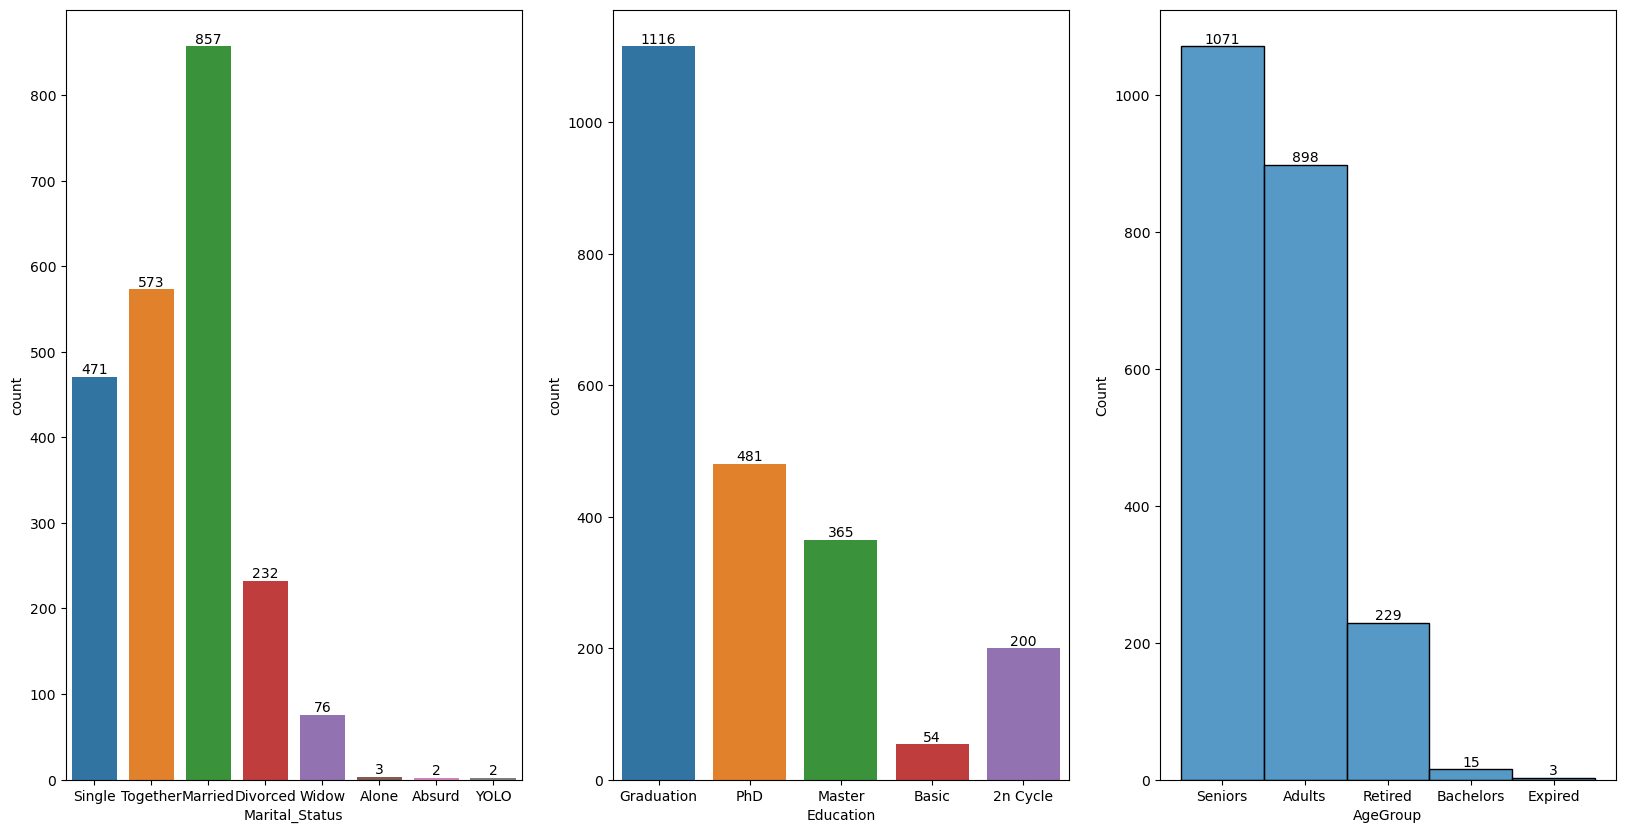

In [13]:
# assign required values
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
 
# illustrate count plots
ax1 = sns.countplot(x=df2['Marital_Status'], ax=axes[0])
for i in ax1.containers:
    ax1.bar_label(i)
ax2 = sns.countplot(x=df2['Education'], ax=axes[1])
for i in ax2.containers:
    ax2.bar_label(i)
ax3 = sns.histplot(x=df2['AgeGroup'],ax = axes[2])
for i in ax3.containers:
    ax3.bar_label(i)
plt.show()

   In the plots above we get the count distribution within our categorical variables: Marital_Status, Education & Age Group. Inferences:

within our dataset, the count of Married individuals is highest, followed by Together & Singles.

within our dataset, the count of Graduated individuals is highest, followed by PHD & Masters.

within our dataset, the count of Senior individuals is highest, followed by Adults & Retired.

### Distribution Analysis of Customer Income accross different Categorical groups

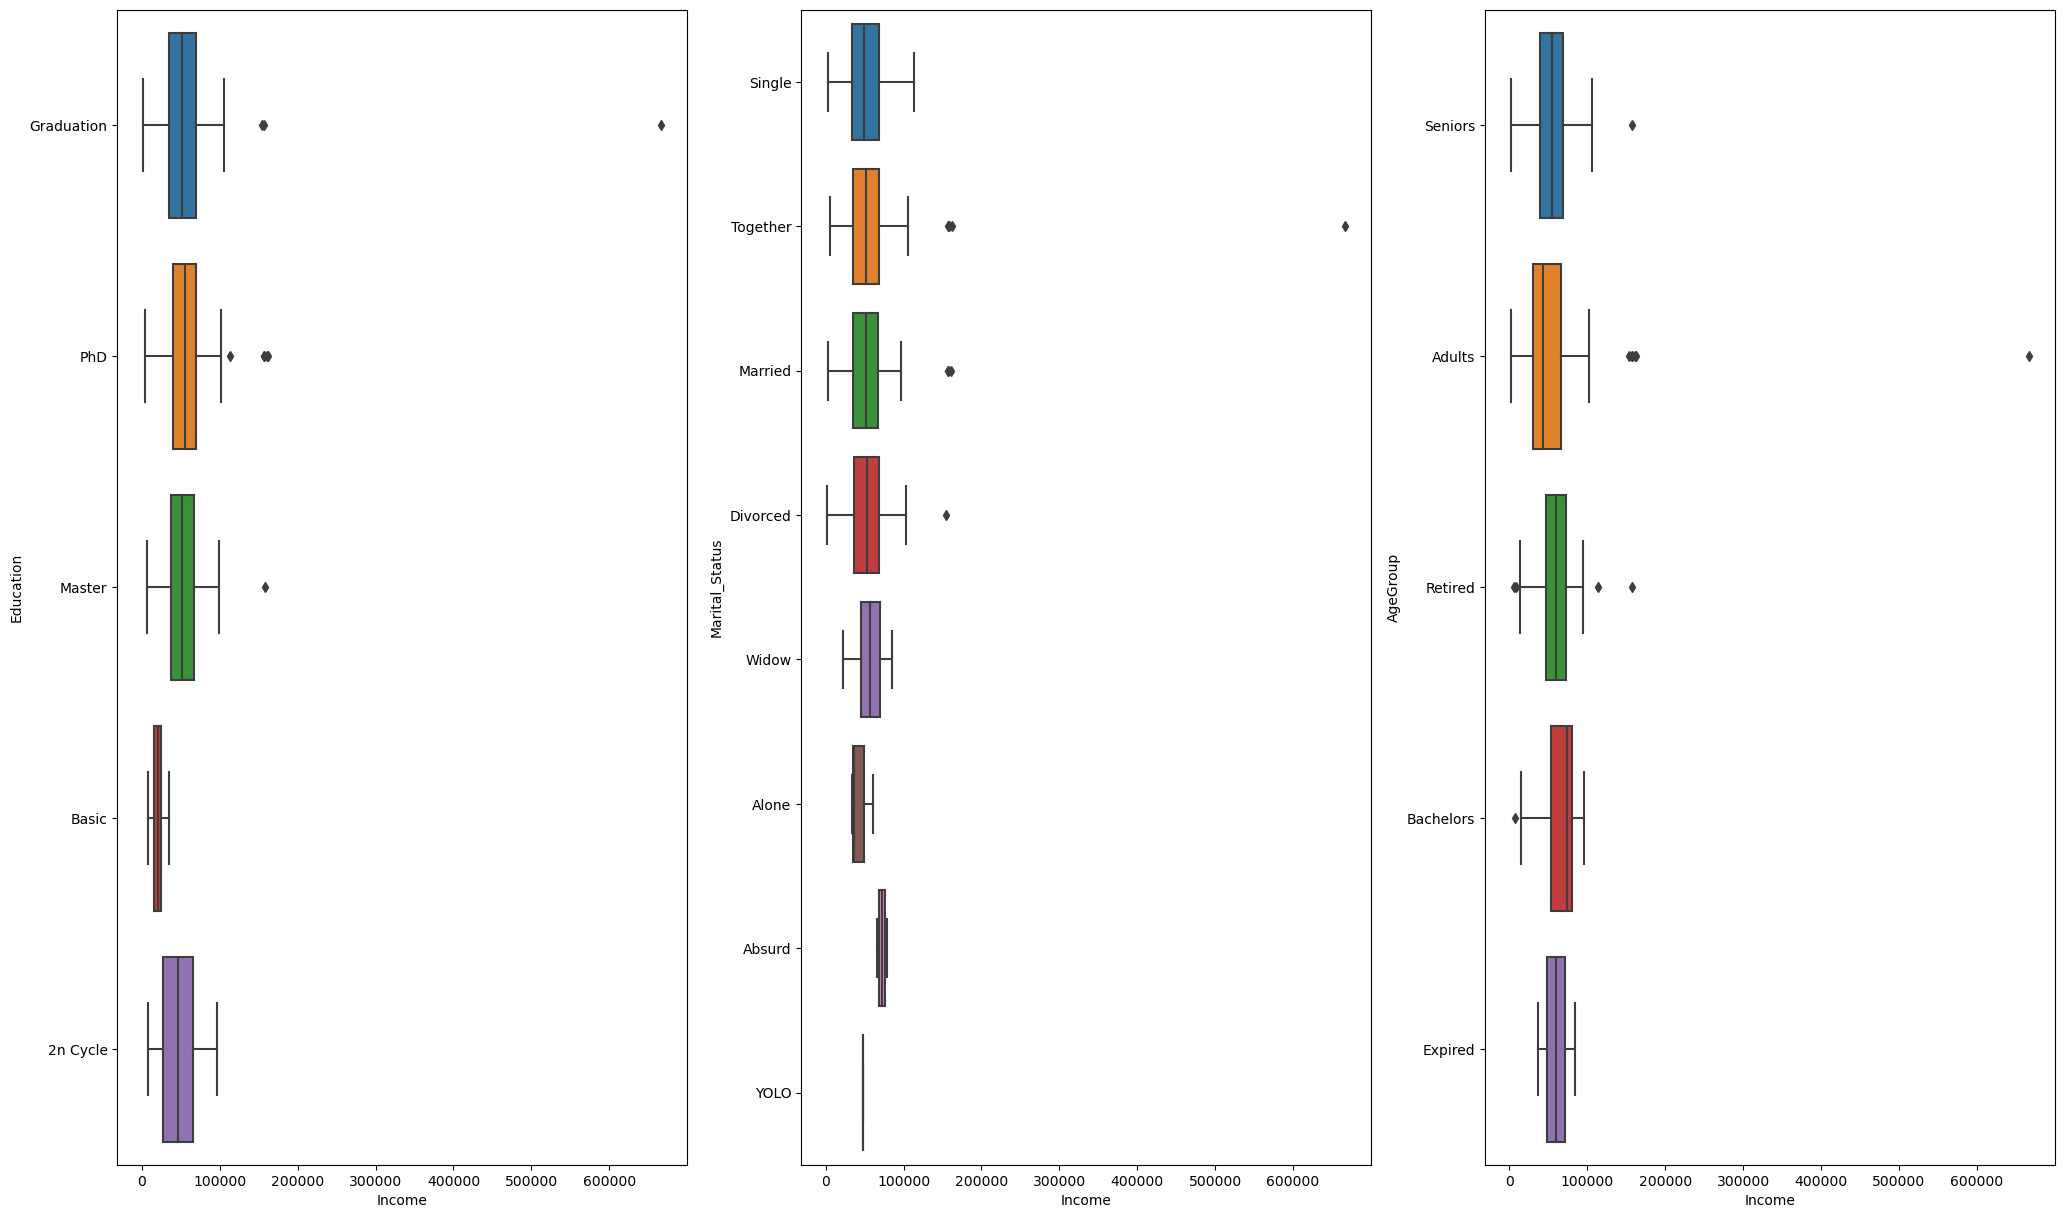

In [14]:
import seaborn as sns
 
# assign required values
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,15))

ax4 = sns.boxplot(data=df2,x="Income",y="Education",ax = axes[0])
ax5 = sns.boxplot(data=df2,x="Income",y="Marital_Status",ax = axes[1])
ax6 = sns.boxplot(data=df2,x="Income",y="AgeGroup",ax = axes[2])
plt.show()

In the plot we aim to study the distribution of income, across 3 categorical variables. Inferences obtained:

we have an average income of 10K accross all education statuses, Graduated holding the highest outlier with approx 65K.

we have an average income of 10K accross all Marital statuses, Together holding the highest outlier with approx 70K.

we have an average income of 10K accross all age groups, Adults holding the highest outlier with approx 65K.



### Aggregrated Purchase pattern analysis accross different categorical groups

In [16]:
aggregrated_df2 = df2.groupby(['AgeGroup','Education','Marital_Status']).agg({'Income': 'mean' , 'MntWines': 'mean', 'MntFruits': 'mean', 'MntMeatProducts': 'mean', 'MntFishProducts': 'mean', 'MntSweetProducts': 'mean', 'MntGoldProds': 'mean','NumDealsPurchases': 'mean', 'NumWebPurchases': 'mean', 'NumCatalogPurchases': 'mean', 'NumStorePurchases': 'mean', 'NumWebVisitsMonth': 'mean'})
aggregrated_df2= aggregrated_df2.reset_index()

aggregrated_df2

,AgeGroup,Education,Marital_Status,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,Adults,2n Cycle,Divorced,33933.875000,178.125000,6.625000,31.750000,11.625000,5.250000,17.625000,1.750000,1.625000,0.625000,4.000000,6.750000
1,Adults,2n Cycle,Married,38466.956522,104.347826,14.804348,62.347826,21.956522,14.739130,27.652174,2.326087,3.021739,1.130435,4.586957,6.326087
2,Adults,2n Cycle,Single,48971.086957,181.956522,26.086957,140.043478,39.695652,24.391304,45.739130,1.826087,3.478261,2.000000,4.826087,5.695652
3,Adults,2n Cycle,Together,39591.916667,157.472222,25.250000,108.638889,70.777778,40.888889,40.444444,2.416667,3.611111,2.083333,4.805556,5.916667
4,Adults,2n Cycle,Widow,47682.000000,162.000000,61.000000,83.000000,97.000000,57.000000,61.000000,4.000000,4.000000,3.000000,8.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Seniors,PhD,Divorced,56175.064516,462.870968,26.225806,145.387097,32.870968,11.935484,41.258065,2.935484,4.645161,3.000000,6.129032,5.193548
78,Seniors,PhD,Married,56613.696970,416.707071,20.595960,157.565657,26.282828,19.575758,28.434343,2.909091,4.747475,3.070707,6.737374,5.454545
79,Seniors,PhD,Single,52430.468085,359.936170,17.638298,153.297872,25.574468,16.042553,31.042553,2.404255,4.063830,2.851064,5.638298,5.106383
80,Seniors,PhD,Together,53735.589286,402.892857,13.125000,148.535714,19.321429,12.250000,27.232143,2.196429,4.000000,2.625000,5.607143,5.750000


 In the table above we have an aggregrated data displaying the average statistics accross our categorical variables. The table above can be utilized to understand more in depth about the characteristics of the categorical variables and also study the correlation existing within them.

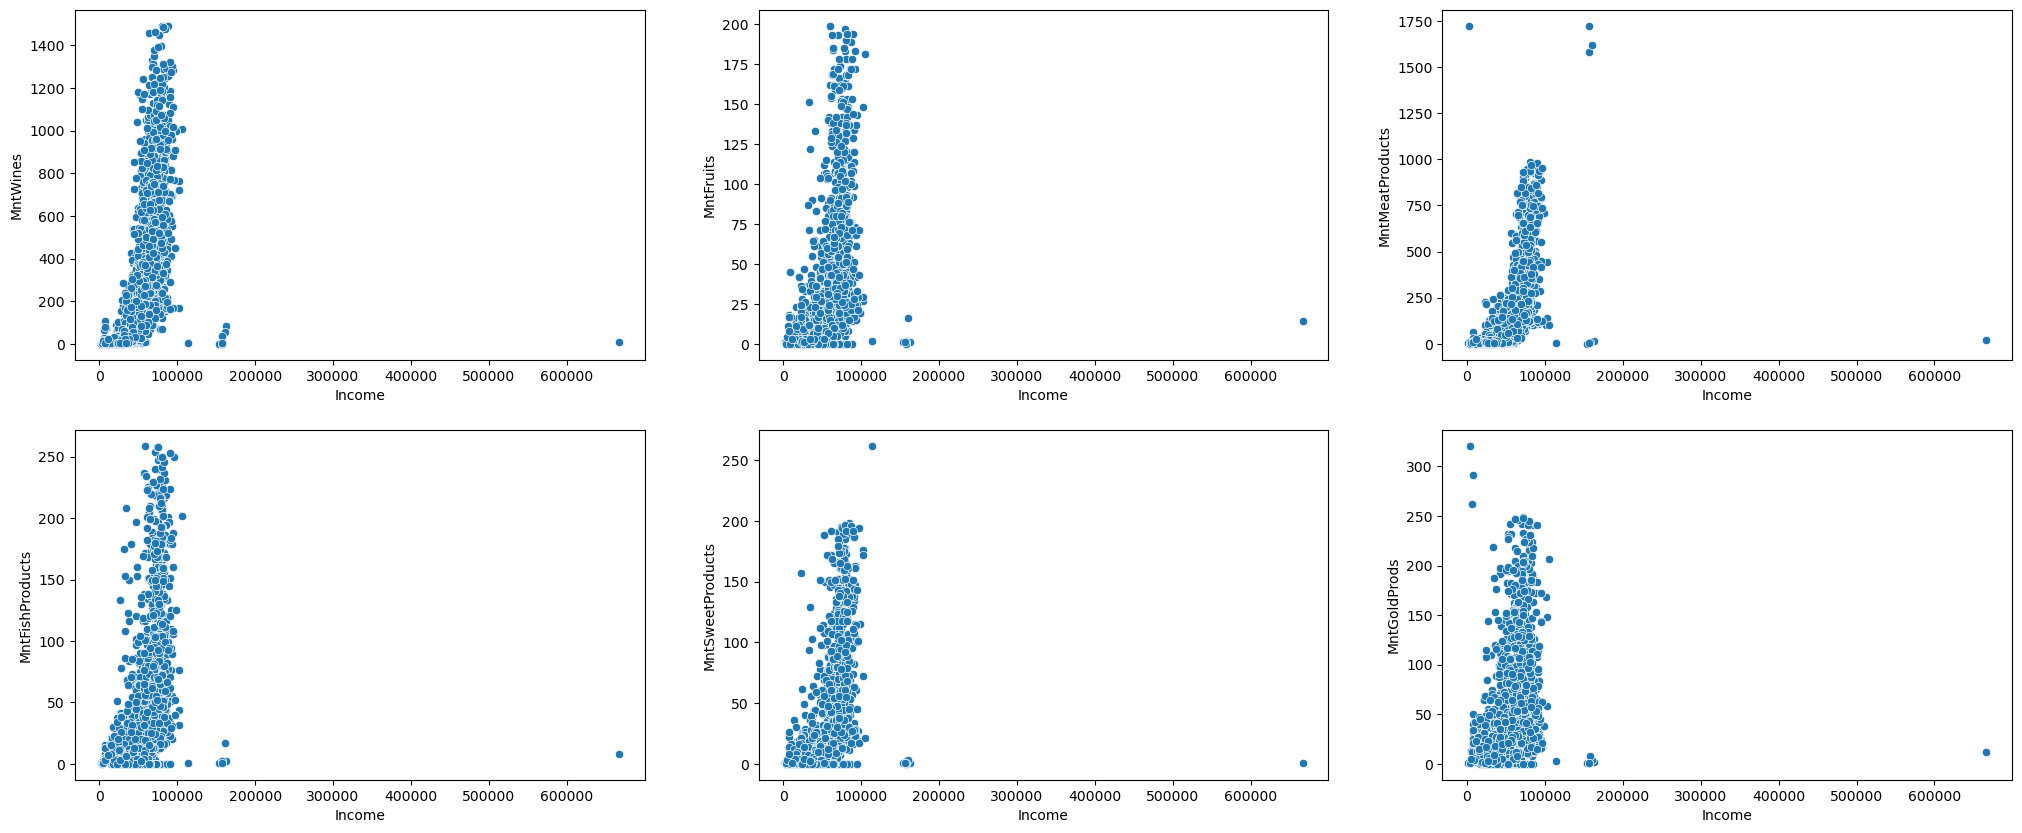

In [17]:
v2 = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))
c = 0

for i in range(2):
    for j in range(3):
        sns.scatterplot(data=df2, x='Income', y=v2[c], ax=axes[i, j])
        c += 1

plt.show()

The plots above aim to illustrate the correlation of Income accross the different product categories.

## Correlation analysis of Income Across Market segments

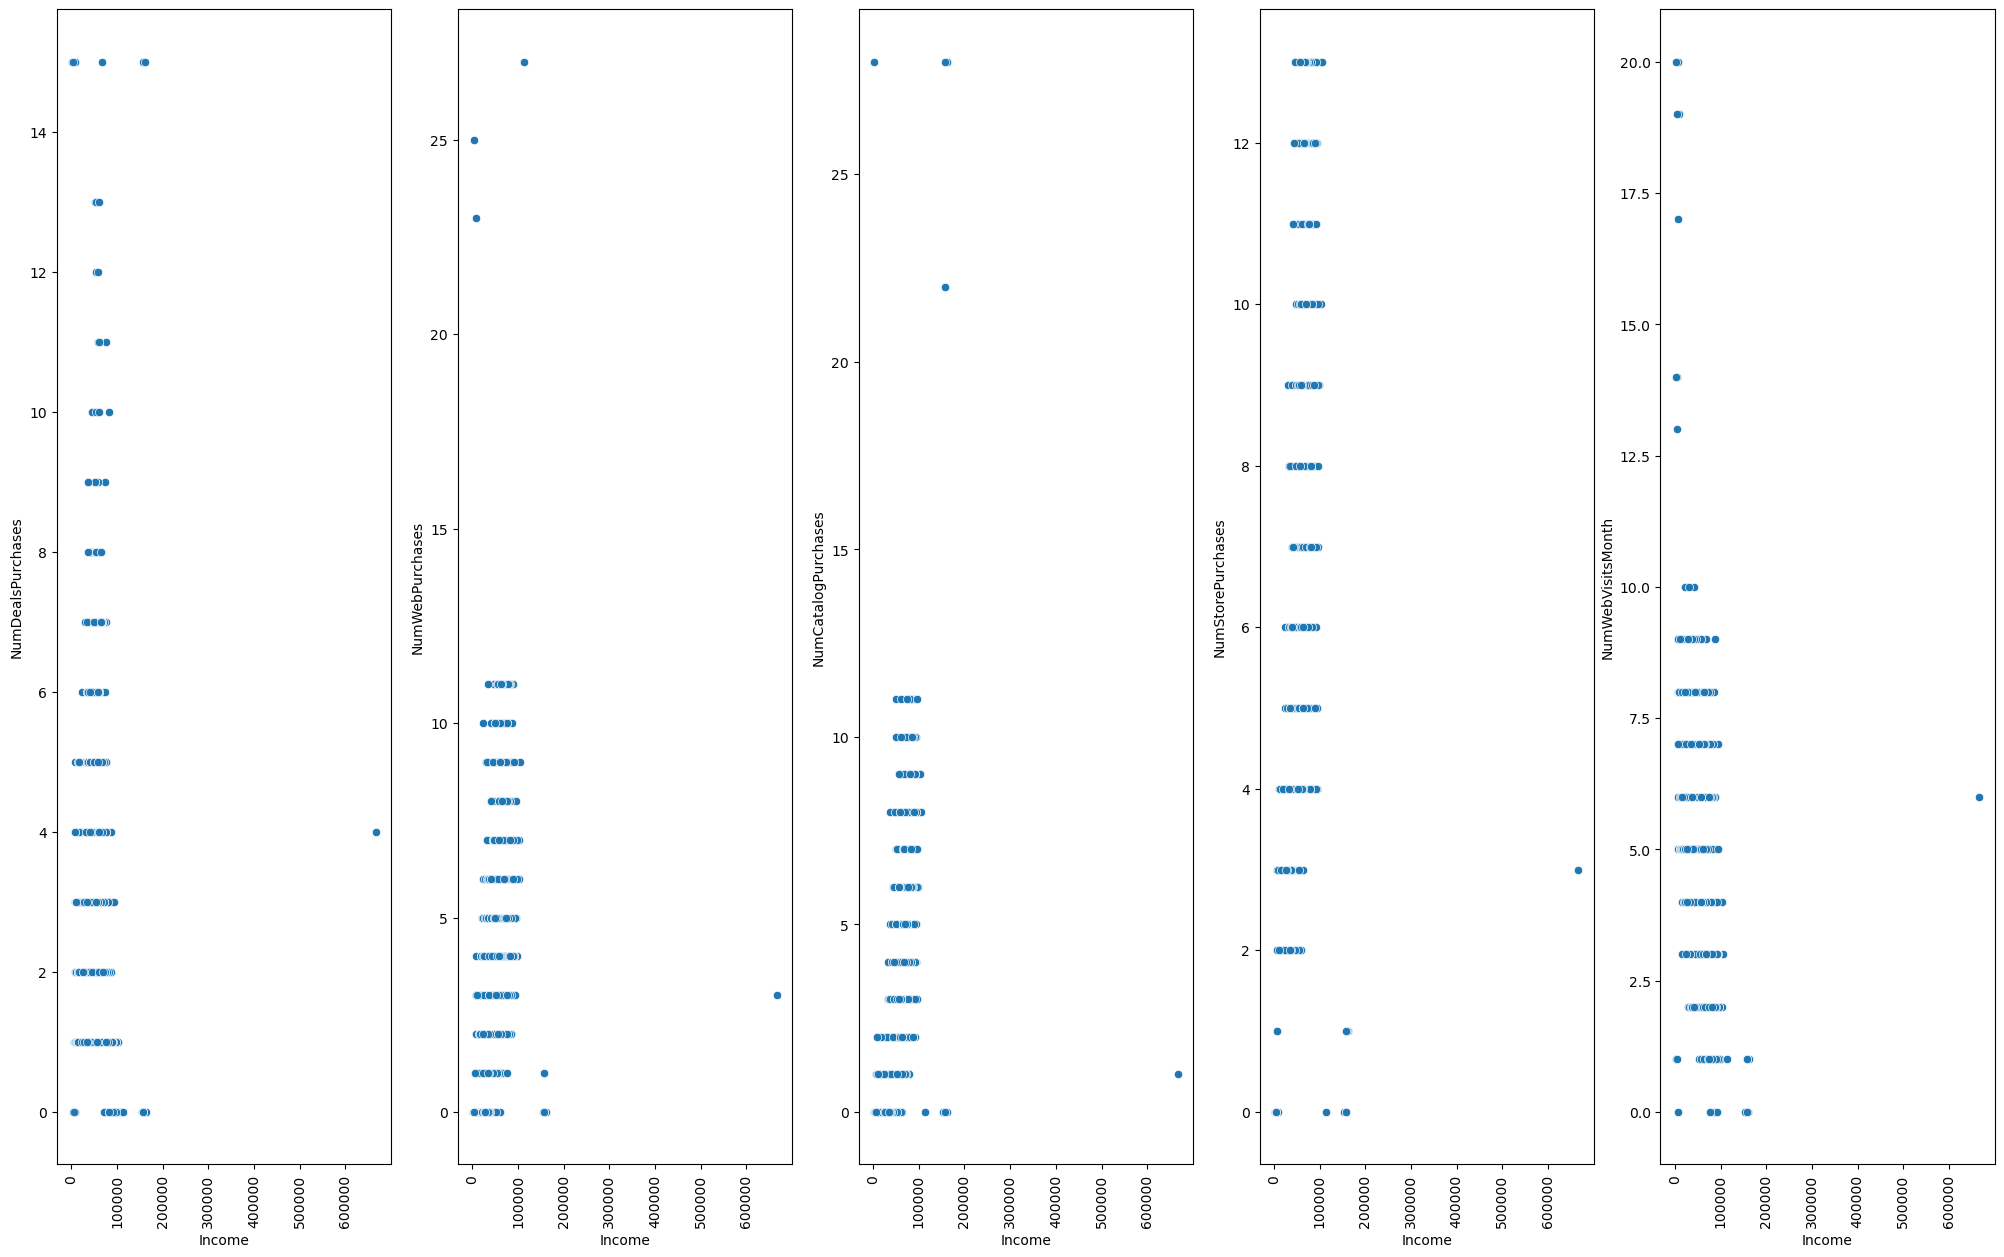

In [18]:
v2 = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 15))

for i in range(len(v2)):
    sns.scatterplot(data=df2, x='Income', y=v2[i], ax=axes[i])
    axes[i].tick_params(axis='x', labelrotation=90)

plt.show()

### The plots above aim to illustrate the correlation of Income accross the different Market categories.
Under this section, now we shall be focusing on model development. These models are objects that analyse patterns hidden uderlying within our datasets and can be utilised to perform predictive ,clustering or regression analysis. As a matter of of fact we will be looking into all 3 types of model development and thier usage within this project. But first there are some data engineering & pre processing ensential to make them suitable to be fit in a model.
 

## Encoding Categorical attributes

In [19]:
encoder1 = LabelEncoder()
df2['Education'] = encoder1.fit_transform(df2['Education'])
encoder2 = LabelEncoder()
df2['Marital_Status'] = encoder2.fit_transform(df2['Marital_Status'])

df2

,Age,AgeGroup,Education,Marital_Status,Income,Kidhome,Teenhome,FirstVisit,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,OfferAccepted,Complain
0,66,Seniors,2,4,58138.0,0,0,734255,58,635,...,172,88,88,3,8,10,4,7,1,0
1,69,Seniors,2,4,46344.0,1,1,733705,38,11,...,2,1,6,2,1,1,2,5,0,0
2,58,Seniors,2,5,71613.0,0,0,733904,26,426,...,111,21,42,1,8,2,10,4,0,0
3,39,Adults,2,5,26646.0,1,0,733731,26,11,...,10,3,5,2,2,0,4,6,0,0
4,42,Adults,4,3,58293.0,1,0,733753,94,173,...,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,56,Seniors,2,3,61223.0,0,1,733973,46,709,...,42,118,247,2,9,3,4,5,0,0
2236,77,Retired,4,5,64014.0,2,1,733611,56,406,...,0,0,8,7,8,2,5,7,1,0
2237,42,Adults,2,2,56981.0,0,0,733747,91,908,...,32,12,24,1,2,3,13,6,1,0
2238,67,Seniors,3,5,69245.0,0,1,733748,8,428,...,80,30,61,2,6,5,10,3,0,0


In [20]:
final_df = df2[['Age','Education', 'Marital_Status', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'OfferAccepted']]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2216 non-null   int64  
 1   Education            2216 non-null   int32  
 2   Marital_Status       2216 non-null   int32  
 3   Income               2216 non-null   float64
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

## Pearson's Corelation Analysis

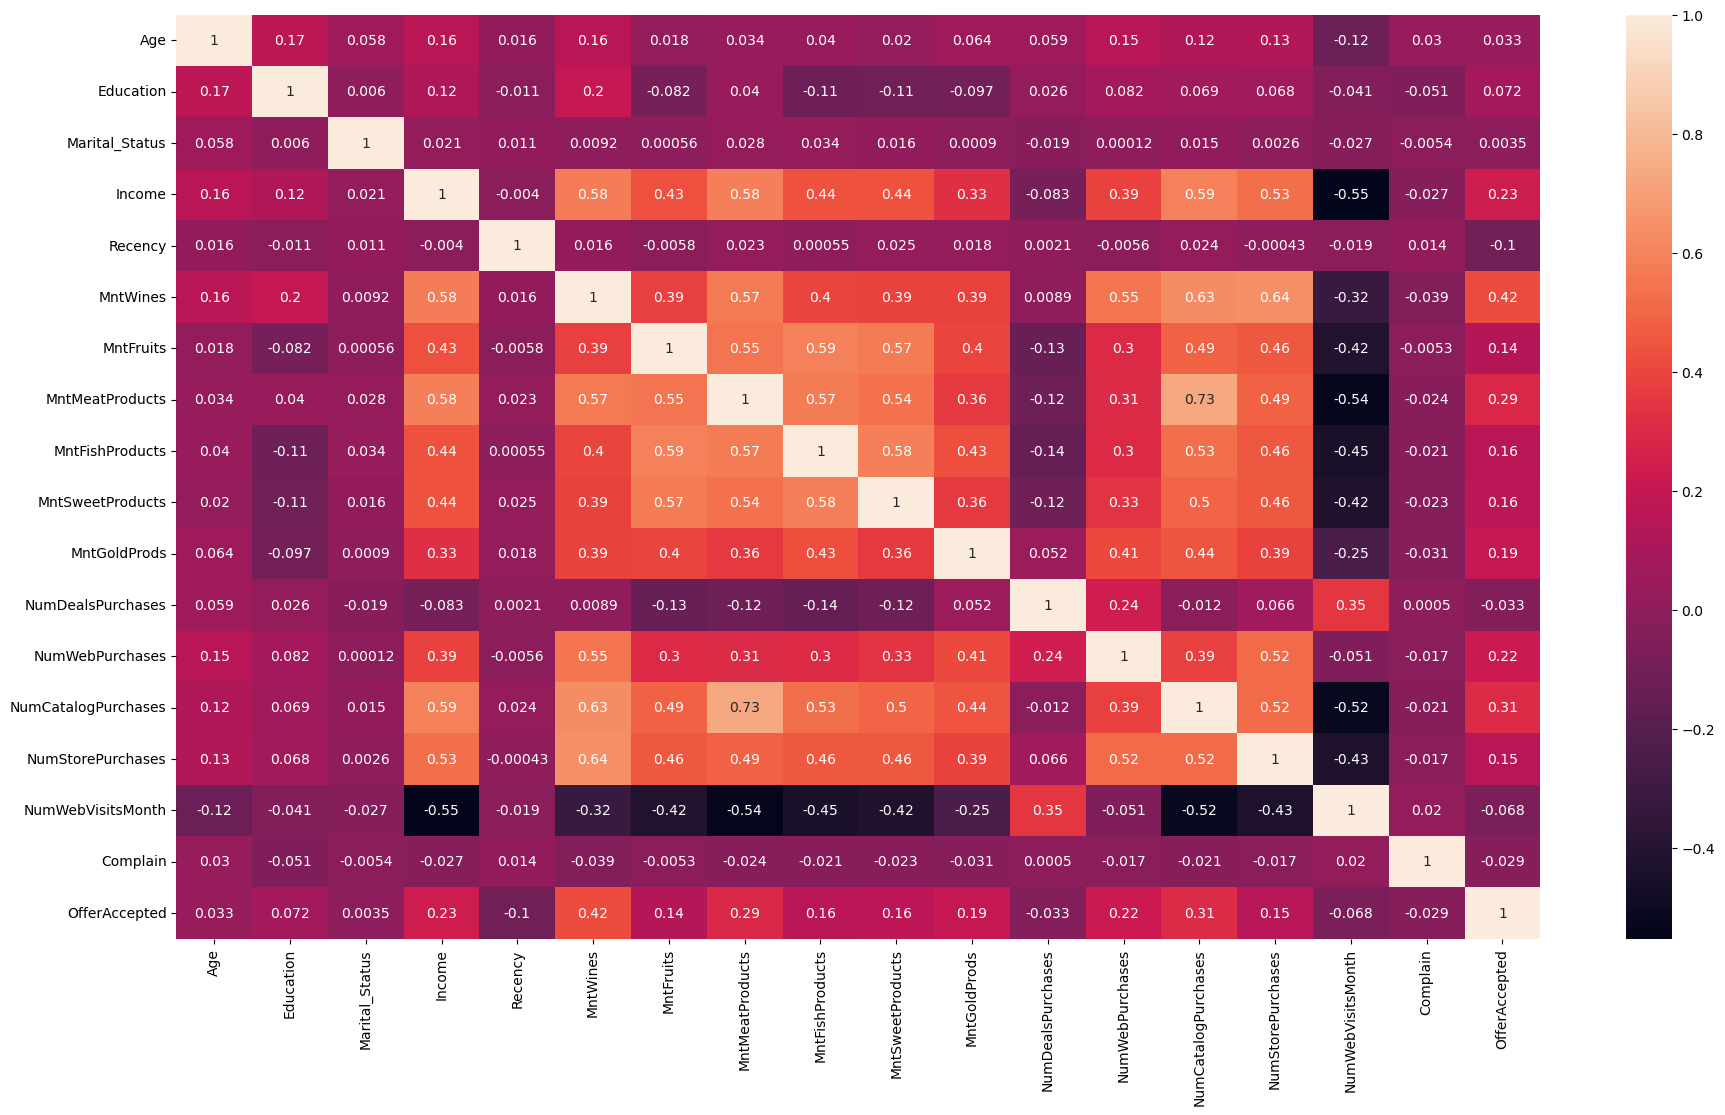

In [21]:
plt.figure(figsize=(22,12))
cor = final_df.corr()
sns.heatmap(cor, annot= True)
plt.show()


In the heatmap above , we aim to study the correlation between different variables using pearson correlation analysis

## Principal Component Analysis of the data attributes

In [22]:
data = final_df.iloc[:,:].values
pca = PCA()
pca_data = pca.fit_transform(data)
for variance in pca.explained_variance_ratio_:
    print(round(variance,5), end= ' ')

0.99981 0.00013 4e-05 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

The above list demonstrates the Percent of information retained in each matrix , after the principal component decomposition. By using this we can detect & remove unwanted noise from our dataset. The heat map that follows also illustrates the amount of information retained by each matrix accross all attributes.

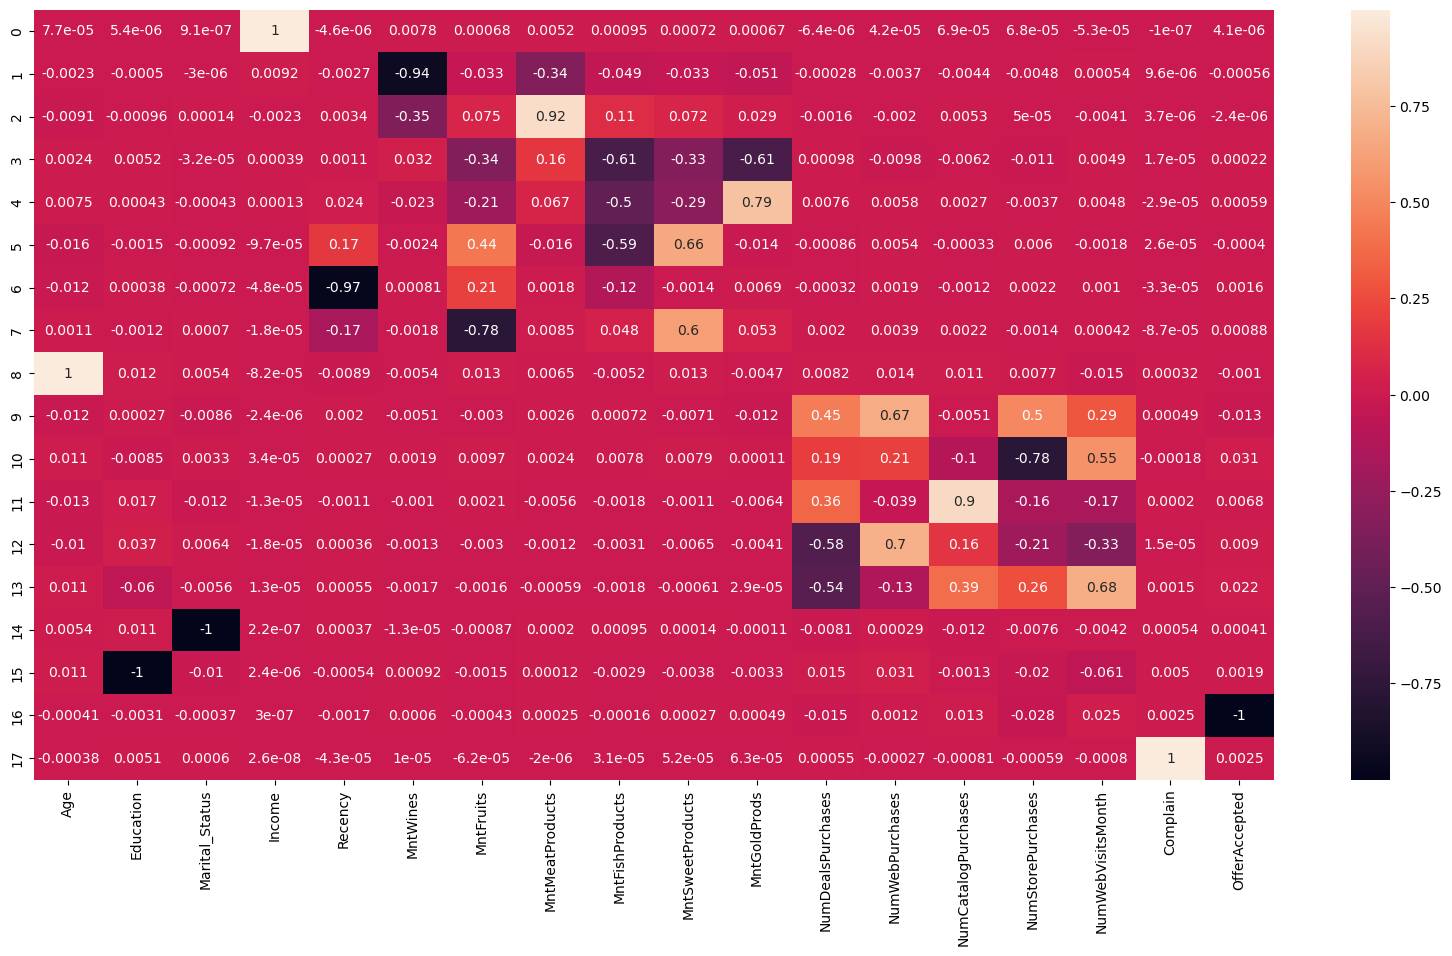

In [23]:
cols= list(final_df.columns)
comps = pd.DataFrame(pca.components_, columns = cols)
fig = plt.figure(figsize = (20,10))
sns.heatmap(comps, annot = True)
plt.show()

## Predictive analysis using classification modelling

Within this section we will be building a predictive model to predict weather a person will accept a marketting campaign offer or not , using the customers demographic & purchases history

In [24]:
X= final_df.iloc[: , :-1].values
Y = final_df.iloc[: , -1].values

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [26]:
scores = []
degrees = [int (i) for i in range(2,11)]
for i in degrees:
    model = SVC(kernel = 'poly' ,degree =i, random_state = 0)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    model_accuracy = accuracy_score(y_test,y_pred)
    scores.append(model_accuracy*100)

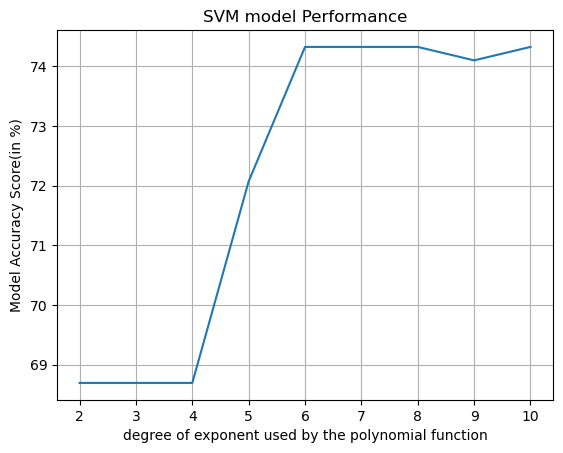

In [27]:
plt.plot(degrees,scores)
plt.xlabel('degree of exponent used by the polynomial function')
plt.ylabel('Model Accuracy Score(in %)')
plt.title('SVM model Performance')
plt.grid()
plt.show()

In the above illustration we get a glimpse of model optimization via tuning of hyperparameters vs its performance. we can see Support Vector model could give a maximum of 74% accuracy. Lets now experiment using a ensemble learning model

In [28]:
scores = []
degrees = [int (5*i) for i in range(1,26)]
for i in degrees:
    model = RandomForestClassifier(n_estimators = i,random_state = 32)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    model_accuracy = accuracy_score(y_test,y_pred)
    scores.append(model_accuracy*100)

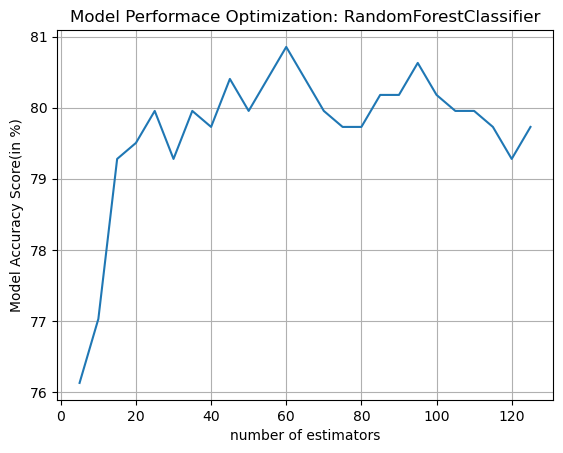

In [29]:
plt.plot(degrees,scores)
plt.xlabel('number of estimators')
plt.ylabel('Model Accuracy Score(in %)')
plt.title('Model Performace Optimization: RandomForestClassifier')
plt.grid()
plt.show()

In the illustration above we could see model optimization via tuning of hyperparameters and parallely studing its performance. we can see our RandomForest model could give an accuracy above 80% using n_estimators = 60. so we finailize RandomForestModel using n_estimators = 60 within this project our perfect model for the task

In [30]:
best_predictive_model = RandomForestClassifier(n_estimators = 60, random_state =32)
best_predictive_model.fit(x_train,y_train)
preds =best_predictive_model.predict(x_test)
model_acc = accuracy_score(y_test,preds)
print(f'The model Performs at an accuracy of {model_acc*100} %\n')
model_performance = classification_report(y_test,preds, target_names= ['Offer Rejected','Offer Purchased'])
print(model_performance)

The model Performs at an accuracy of 80.85585585585585 %

                 precision    recall  f1-score   support

 Offer Rejected       0.80      0.97      0.87       305
Offer Purchased       0.86      0.46      0.60       139

       accuracy                           0.81       444
      macro avg       0.83      0.71      0.74       444
   weighted avg       0.82      0.81      0.79       444



The statistics above illustrates the Performance Report card of our Predictative analysis model.

Predictive Analysis using Regression modelling

Under this section we shall be builing a regression analysis model to predict an average amount of investment that can be expected from a potential customer , using his demographic data and purchase histories.

In [31]:
X = final_df.iloc[: , [0,1,2,3,4,11,12,13,14,15,16,17]].values
targets = final_df.iloc[: , [5,6,7,8,9,10]].values
Y=[]
for row in range(len(targets)):
    avg = sum(targets[row])//len(targets[row])
    Y.append(avg)

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)


In [33]:
regression_model = SVR(kernel = 'rbf')
regression_model.fit(x_train,y_train)

SVR()

In [34]:
preds = regression_model.predict(x_test)

score = r2_score(y_test,preds)
score = round(score,2)
print(f'The model has a R2 score of {score}.')

The model has a R2 score of 0.7.


In finance, an R-squared equals or above 0.7 would generally be seen as showing a high level of correlation, indicating strong ability of the regression model to predict the average investment a given customer will make, given his demographic data.

## Customer Segmentation using KMeans Clustering

The models we have been building so far can be reffered to as supervised learning models. Within this section we shall aim to build an unsupervised learning model, using KMeans Clustering to group customers into clusters.

In [35]:
X = final_df.iloc[: , :].values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
inertia = []
n_clusters = [int (i) for i in range(2,10)]

for i in n_clusters:
    model = KMeans(init = 'k-means++', n_clusters = i, random_state =32)
    model.fit(x_scaled)
    inertia.append(model.inertia_)

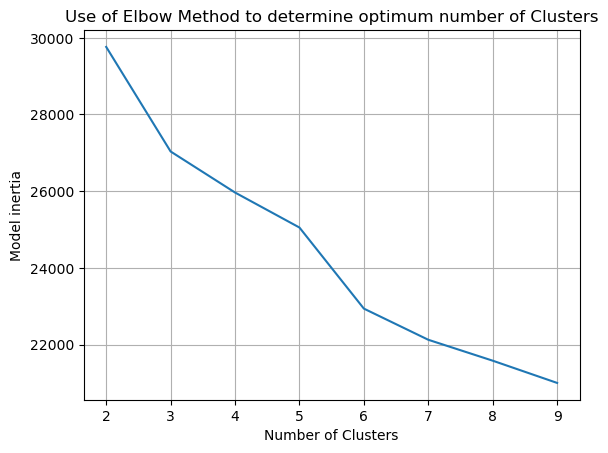

In [36]:
plt.plot(n_clusters, inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Model inertia')
plt.title('Use of Elbow Method to determine optimum number of Clusters')
plt.grid()
plt.show()

In the chart illustrated above we make use of the Elbow Method to determine the optimum number of clusters to be chosen for the job

In [37]:
cluster_model = KMeans(init = 'k-means++', n_clusters = 6,random_state = 0)
cluster_model.fit(x_scaled)
final_df['Customer_Segment'] = cluster_model.labels_

## EDA accross customer segments obtained

In [38]:
customers_segment = final_df.groupby('Customer_Segment').agg({'Age':'mean', 'Income': 'mean' , 'MntWines': 'mean', 'MntFruits': 'mean', 'MntMeatProducts': 'mean', 'MntFishProducts': 'mean', 'MntSweetProducts': 'mean', 'MntGoldProds': 'mean','NumDealsPurchases': 'mean', 'NumWebPurchases': 'mean', 'NumCatalogPurchases': 'mean', 'NumStorePurchases': 'mean', 'NumWebVisitsMonth': 'mean'})
customers_segment = customers_segment.reset_index()
customers_segment

,Customer_Segment,Age,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0,45.830018,29445.734177,23.815552,6.336347,21.354430,9.515371,6.099458,16.567812,1.990958,2.019892,0.433996,3.007233,6.998192
1,1,52.405405,73880.837838,498.037162,96.540541,426.891892,133.834459,96.266892,94.743243,1.483108,5.381757,5.469595,8.432432,2.942568
2,2,57.188636,55799.915909,467.486364,18.184091,124.331818,23.161364,19.850000,65.804545,4.418182,6.831818,2.813636,7.502273,6.438636
3,3,57.904762,45242.285714,169.000000,24.190476,112.476190,25.761905,17.523810,27.476190,2.333333,3.619048,2.047619,5.238095,5.809524
4,4,57.565789,76973.423684,692.442105,39.210526,417.184211,62.623684,42.355263,59.976316,1.465789,5.231579,6.097368,8.521053,3.142105
5,5,58.844106,43489.996198,81.982890,5.543726,30.980989,7.602662,5.382129,15.017110,2.013308,2.420152,0.878327,3.891635,5.507605


In [39]:
final_df['Education'] = encoder1.inverse_transform(df2['Education'])
final_df['Marital_Status'] = encoder2.inverse_transform(df2['Marital_Status'])

So from our analysis we can conclude that the customers within our dataset can be broadly categorized into 6 Clusters, Each with thier own unique characteristics & behaviour. The behaviour of each cluster can be breifly described as:

Cluster 0: Lower age group, lower income , mostly graduates & married with no complaints & poor chances to accept any marketting campaigns.

Cluster 1: Median age group , higher income with high product purchases, mostly graduates & married with no complaints and higher likely to decline any marketting campaigns.

Cluster 2: Median age group , median income, mostly married & graduates with no complaints and a 50-50 liklihood to accept any marketting campaigns.

Cluster 3: Median age group , lower quartile income category, mostly married & graduates with many complaints & poor chances to accept any marketting campaigns.

Cluster 4: Median age group ,higher income category with relatively poor product purchases, mostly married & graduates with no complaints and higher liklihood to accept any marketting campaigns.

Cluster 5: Upper age group, lower quartile income category, mostly PhD & married with no complaints & poor chances to accept any marketting campaigns.

To understand more in detail we can refer to the table & charts ,above and below this cell respectively which provides us with a more detailed insight about the characteristics of each cluster.

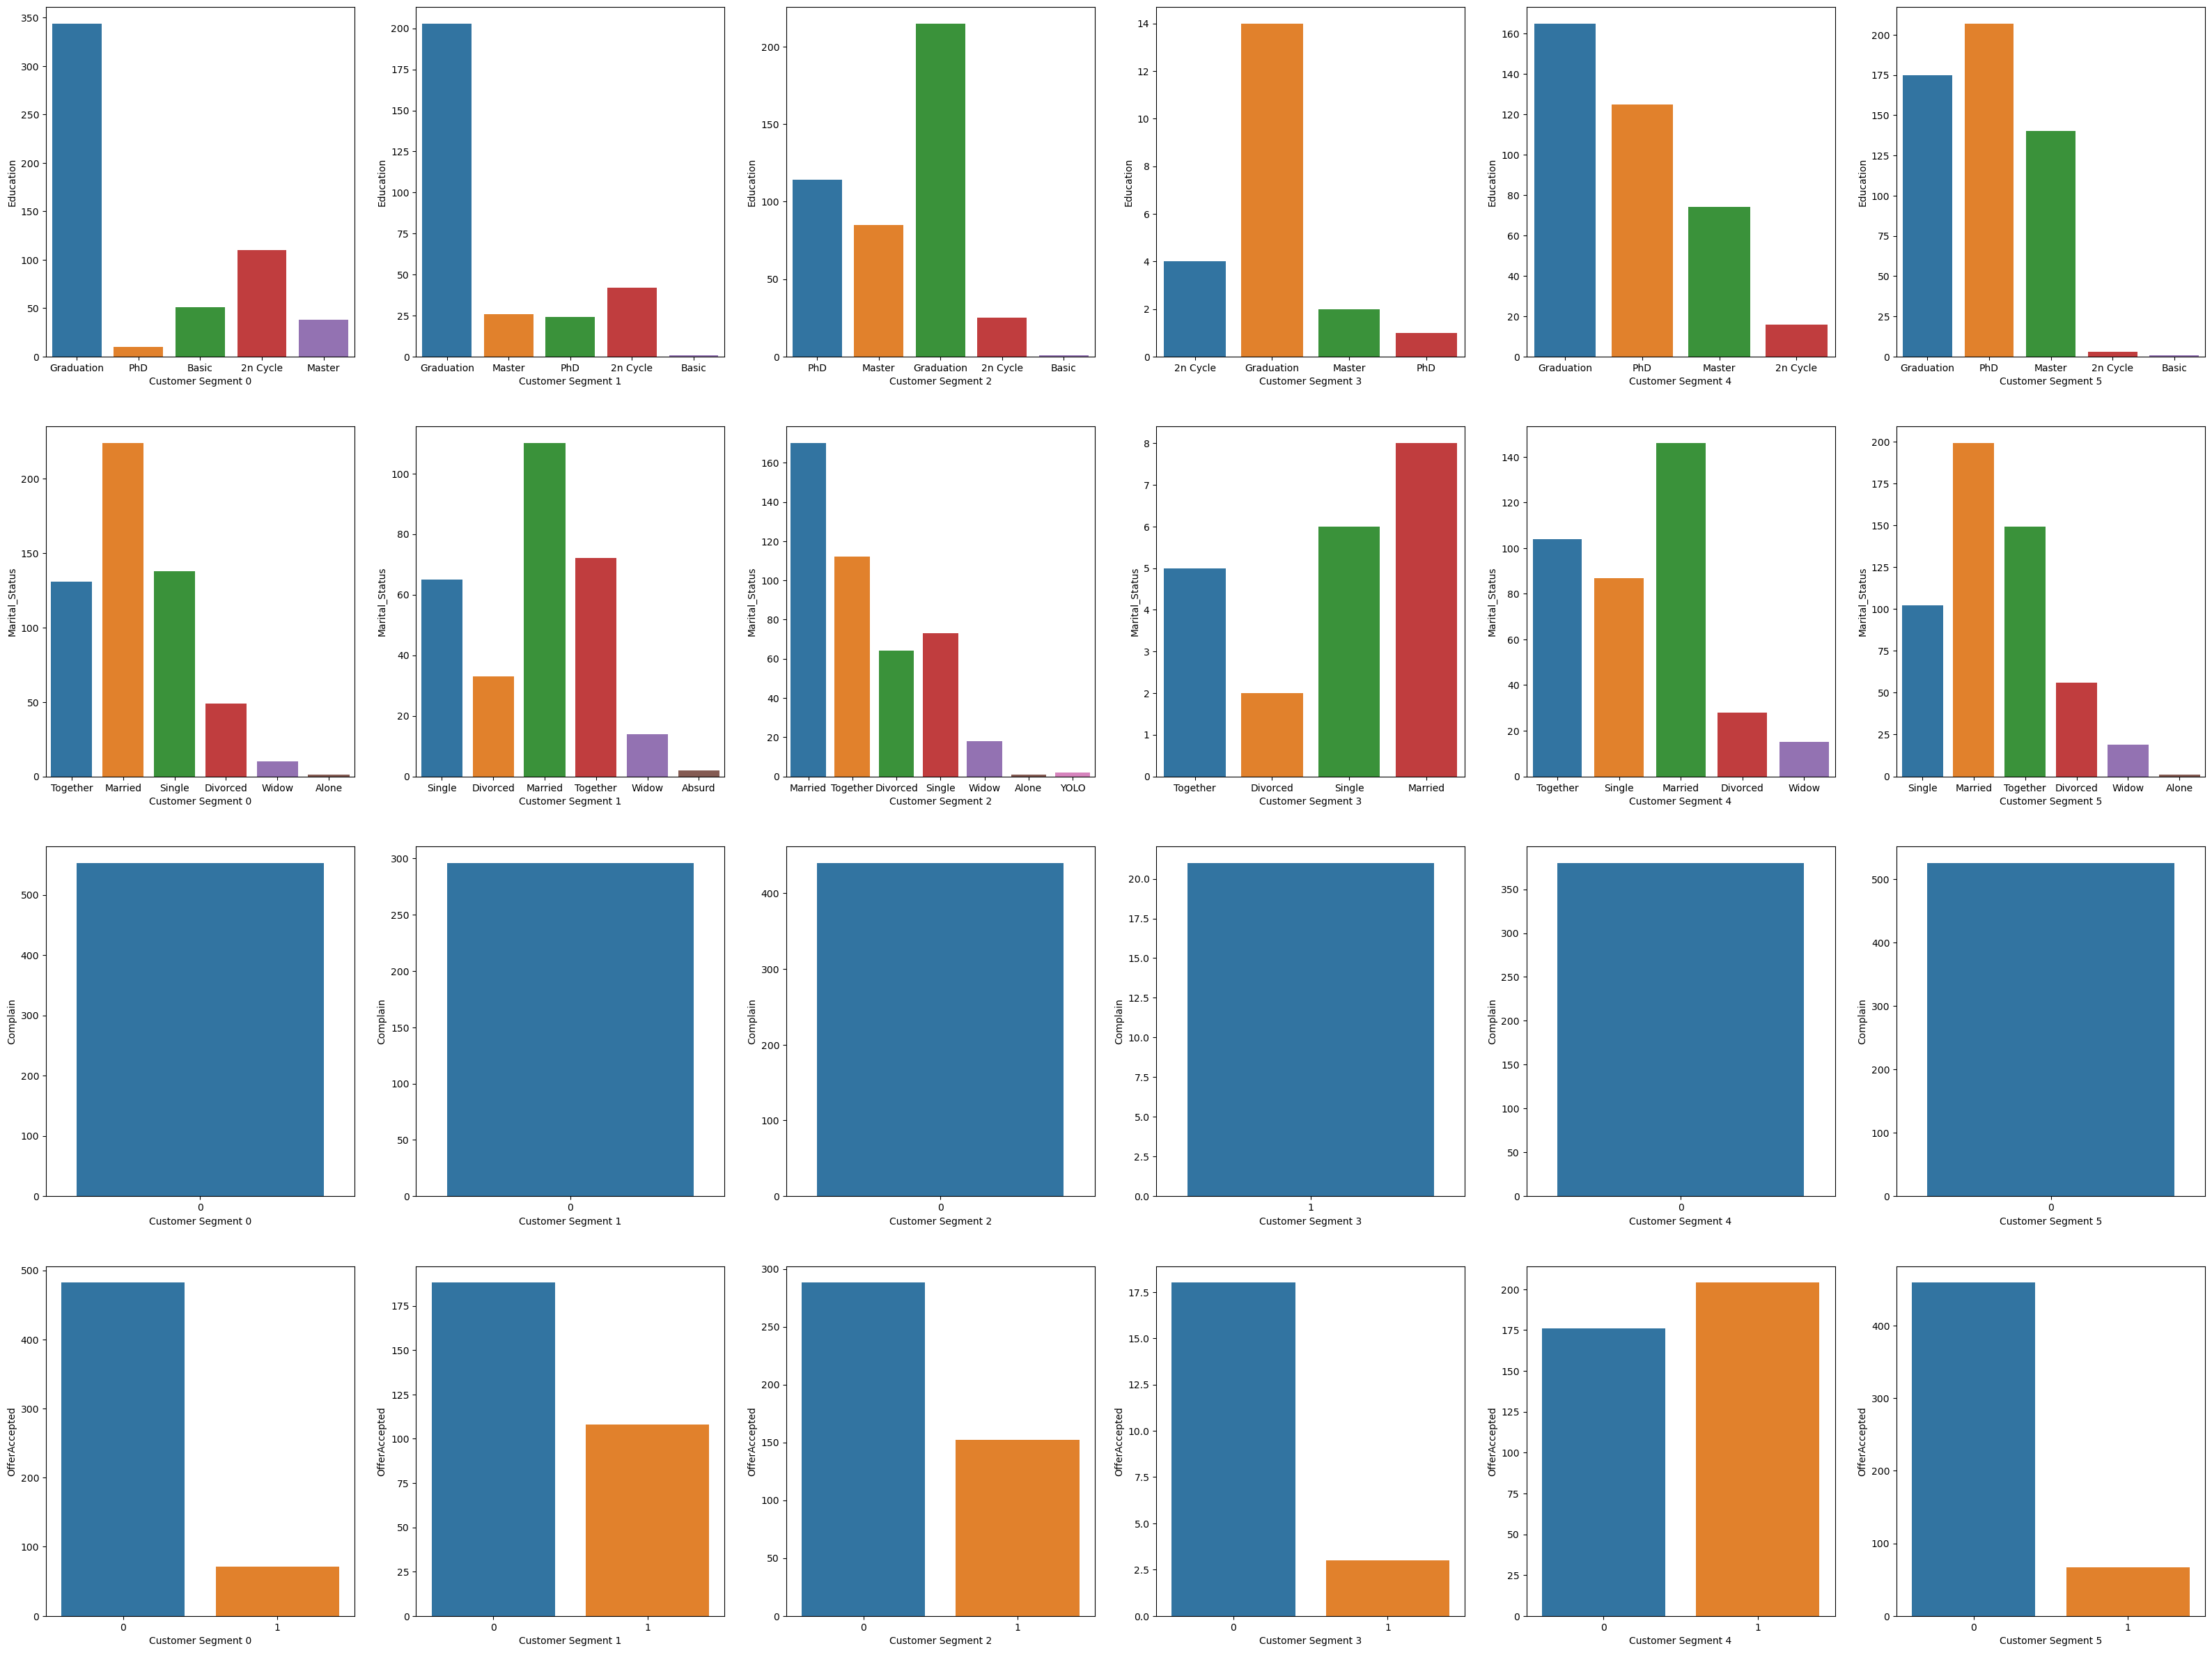

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(40, 30))
var_list = ['Education', 'Marital_Status', 'Complain', 'OfferAccepted']
row = 0

for var in var_list:
    for i in range(6):
        data = final_df[final_df['Customer_Segment'] == i]
        axes[row][i] = sns.countplot(data=data, x=var, ax=axes[row][i])
        axes[row][i].set_xlabel(f'Customer Segment {i}')
        axes[row][i].set_ylabel(var)

    row += 1

plt.show()